In [1]:
# Source: https://github.com/bnsreenu/python_for_microscopists/blob/master/263_Object%20localization%20in%20images%E2%80%8B_using_GAP_layer/263_Object%20localization%20in%20images%E2%80%8B_using_GAP_layer.py
import numpy as np
import scipy   #to upscale the image
import matplotlib.pyplot as plt
import cv2     
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.models import Model   
from PIL import Image

In [2]:
#Import the resnet50 model
model = ResNet50(weights='imagenet')
print(model.summary()) #Notice the Global Average Pooling layer at the last but one

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

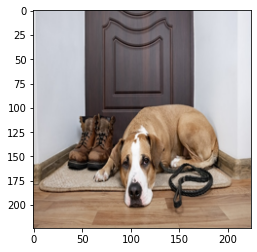

In [3]:
img = cv2.imread('images/dog.jpeg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = Image.fromarray(img, 'RGB')
img = img.resize((224, 224))
img = np.array(img)
plt.imshow(img)

In [4]:
img_tensor = np.expand_dims(img, axis=0)
preprocessed_img = preprocess_input(img_tensor)

In [5]:
# Get weights for the prediction layer (last layer)
# We should see 2048 weights for each of the 1000 classes (2048,1000)
last_layer_weights = model.layers[-1].get_weights()[0]  #Predictions layer

In [6]:
#Output both predictions (last layer) and conv5_block3_add (just before final activation layer)
ResNet_model = Model(inputs=model.input, outputs=(model.layers[-4].output, model.layers[-1].output)) 

In [7]:
#Get the predictions and the output of last conv. layer. 
last_conv_output, pred_vec = ResNet_model.predict(preprocessed_img)
#Last conv. output for the image
last_conv_output = np.squeeze(last_conv_output) #7x7x2048
#Prediction for the image
pred = np.argmax(pred_vec)

decode_predictions(pred_vec, top=1)

[[('n02108422', 'bull_mastiff', 0.27218235)]]

In [8]:
# spline interpolation to resize each filtered image to size of original image 
h = int(img.shape[0]/last_conv_output.shape[0])
w = int(img.shape[1]/last_conv_output.shape[1])
upsampled_last_conv_output = scipy.ndimage.zoom(last_conv_output, (h, w, 1), order=1) # dim: 224 x 224 x 2048

In [9]:
#Get the weights from the last layer for the prediction class
last_layer_weights_for_pred = last_layer_weights[:, pred] # dim: (2048,) 

In [10]:
#To generate the final heat map. 
#Reshape the upsampled last conv. output to n x filters and multiply (dot product) 
# with the last layer weigths for the prediction. 
# Reshape back to the image size for easy overlay onto the original image. 
heat_map = np.dot(upsampled_last_conv_output.reshape((224*224, 2048)), 
                  last_layer_weights_for_pred).reshape(224,224) # dim: 224 x 224

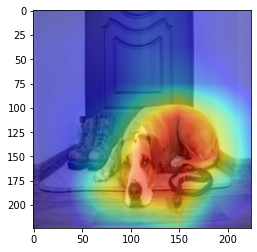

In [11]:
#Plot original image with heatmap overlaid. 
fig, ax = plt.subplots()
ax.imshow(img)
ax.imshow(heat_map, cmap='jet', alpha=0.5)
plt.show()